#  Load and Inspect the Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/BrentOilPrices.csv")

# Check basic structure
print(df.head())
print(df.info())


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None


In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Sort by date (just in case)
df = df.sort_values('Date')

# Set date as index for time series operations
df.set_index('Date', inplace=True)


Price    0
dtype: int64


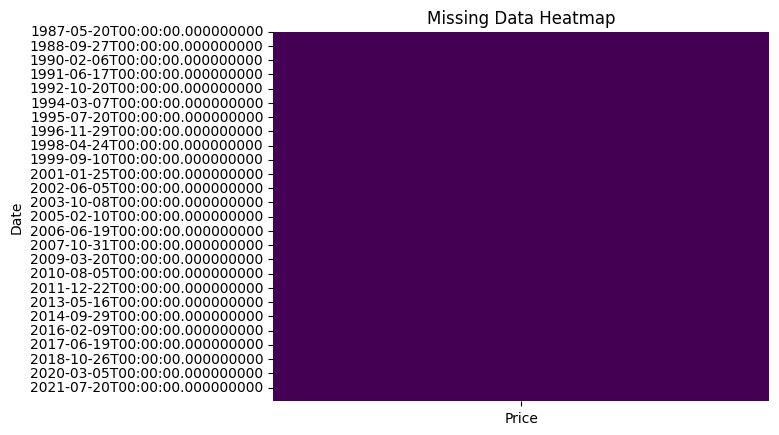

In [5]:
# Check for nulls
print(df.isnull().sum())

# Visualize gaps
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Drop or fill missing values
df = df.dropna()  # or use df.fillna(method='ffill') if preferred


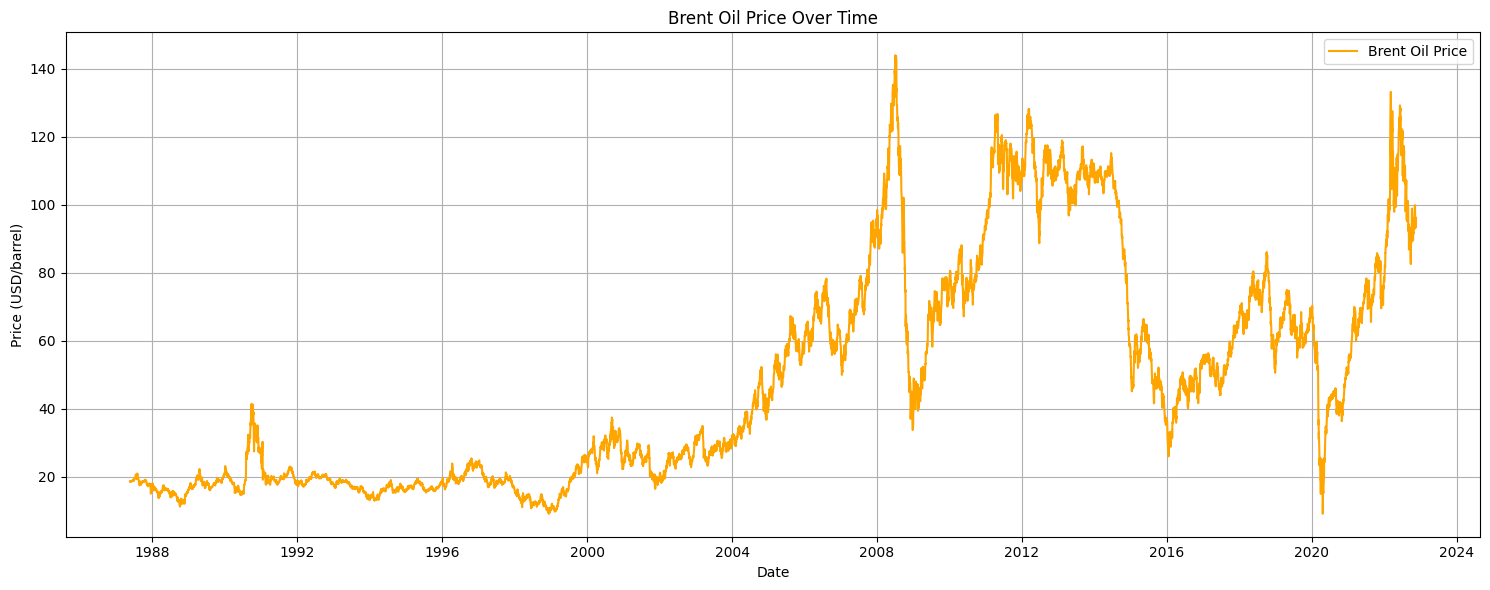

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Price'], label="Brent Oil Price", color='orange')
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
print(df['Price'].describe())


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


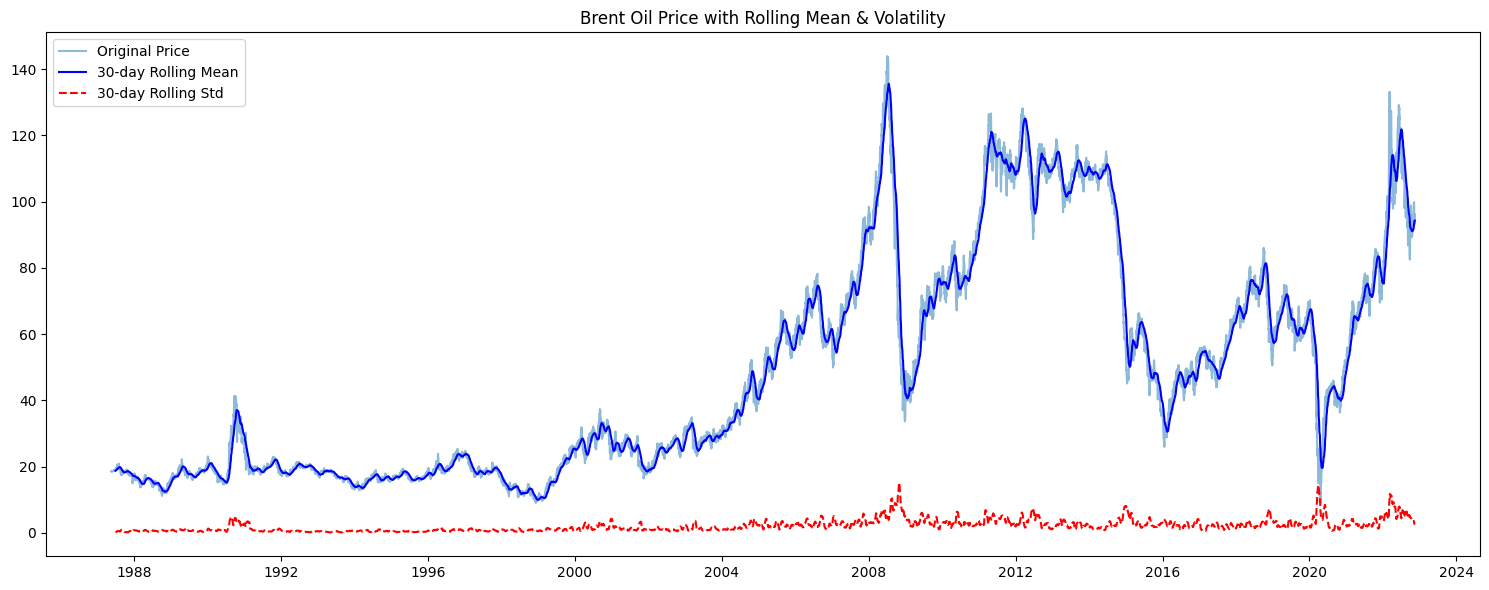

In [8]:
# Rolling mean and std
df['rolling_mean_30'] = df['Price'].rolling(window=30).mean()
df['rolling_std_30'] = df['Price'].rolling(window=30).std()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Price'], label='Original Price', alpha=0.5)
plt.plot(df['rolling_mean_30'], label='30-day Rolling Mean', color='blue')
plt.plot(df['rolling_std_30'], label='30-day Rolling Std', color='red', linestyle='--')
plt.legend()
plt.title("Brent Oil Price with Rolling Mean & Volatility")
plt.tight_layout()
plt.show()


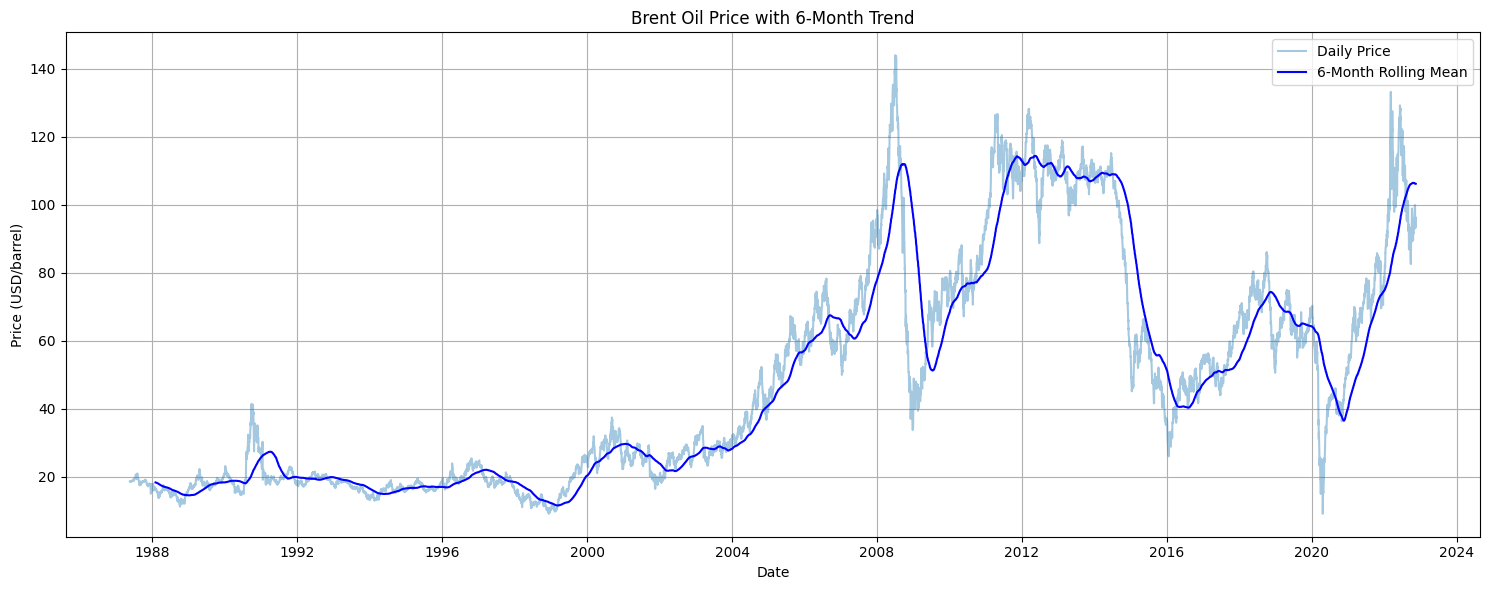

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Price'], label='Daily Price', alpha=0.4)
plt.plot(df['Price'].rolling(window=180).mean(), label='6-Month Rolling Mean', color='blue')
plt.title("Brent Oil Price with 6-Month Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'].dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

if result[1] < 0.05:
    print("✅ The series is likely stationary.")
else:
    print("❌ The series is non-stationary.")


ADF Statistic: -1.9939
p-value: 0.2893
❌ The series is non-stationary.


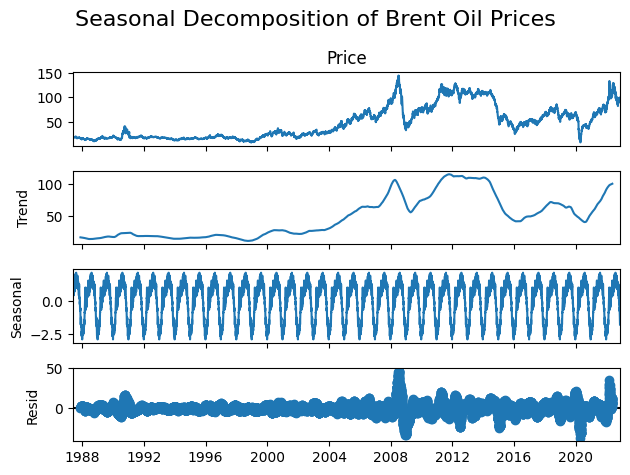

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure daily frequency for decomposition
df_daily = df['Price'].asfreq('D').interpolate()

# Decompose
decomp = seasonal_decompose(df_daily, model='additive', period=365)

# Plot components
decomp.plot()
plt.suptitle("Seasonal Decomposition of Brent Oil Prices", fontsize=16)
plt.tight_layout()
plt.show()
